<a href="https://colab.research.google.com/github/cedric-bit/MLP/blob/main/LEDKDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO-F-422 - Statistical Foundations of Machine Learning
## Project: Modeling Earthquake Damage
# INTRODUCTION
DrivenData competition Richter's Predictor: Modeling Earthquake Damage 

The main objective of this project is to develop a prediction model capable of estimating the level of damage to buildings during the 2015 Nepal earthquake, based on various structural and geographical characteristics.

For this project, we have a dataset comprised of train_features, test_features, and train_labels. Both train_features and test_features include information on buildings, their structure, geographical location, and legal status, collected after the Gorkha earthquake. These datasets have 39 columns each, with the building_id column serving as a unique and random identifier. The remaining 38 features provide information about the building, its structure, construction materials, location, etc., which are useful for predicting damage. The train_labels dataset contains the known output values (damage_grade) for the training data in train_features

In [ ]:
install.packages("ggplot2")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("nnet")
install.packages("randomForest")

library(ggplot2)
library(rpart)
library(rpart.plot)
library(nnet)
library(randomForest)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
set.seed(5)

# Data preprocessing
Data pre-processing is an important step in the analysis of our data. This involves cleaning, transforming and normalising the data to make it ready to be used to train machine learning models.

As I mentioned earlier, we have three CSV files of data that can be downloaded from the competition site :

* train_features: file contains the training data that will be used to 
train machine learning models. The data in this file includes input features and known the target variable).

* train_labels: This file contains the known output values for the training data in train_features. These known output values will be used to train and evaluate the performance of machine learning models.

* test_features: This file contains new data that the trained machine learning models will be used to make predictions on. This file contains input features for which the target variable (i.e., the output) is not known.

In [ ]:
train_features <- read.csv(file="train_values.csv",stringsAsFactors = T)
train_labels <- read.csv(file="train_labels.csv",stringsAsFactors = T)
test_features <- read.csv(file="test_values.csv",stringsAsFactors = T)

In [ ]:
dim(train_features)
dim(test_features) 

[1] 260601     39

[1] 86868    39

This means that our training set contains 260601 building observations and their 39 associated features and test set contains 86868 building observations and their 39 associated features. we can observe that we have l small data for test feature.the building identifier *building_id* has no more information on the prediction, we will remove this variable for the rest of the project.



In [ ]:
str(train_labels)
dim(train_labels)

'data.frame':	260601 obs. of  2 variables:
 $ building_id : int  802906 28830 94947 590882 201944 333020 728451 475515 441126 989500 ...
 $ damage_grade: int  3 2 3 2 3 2 3 1 2 1 ...


[1] 260601      2

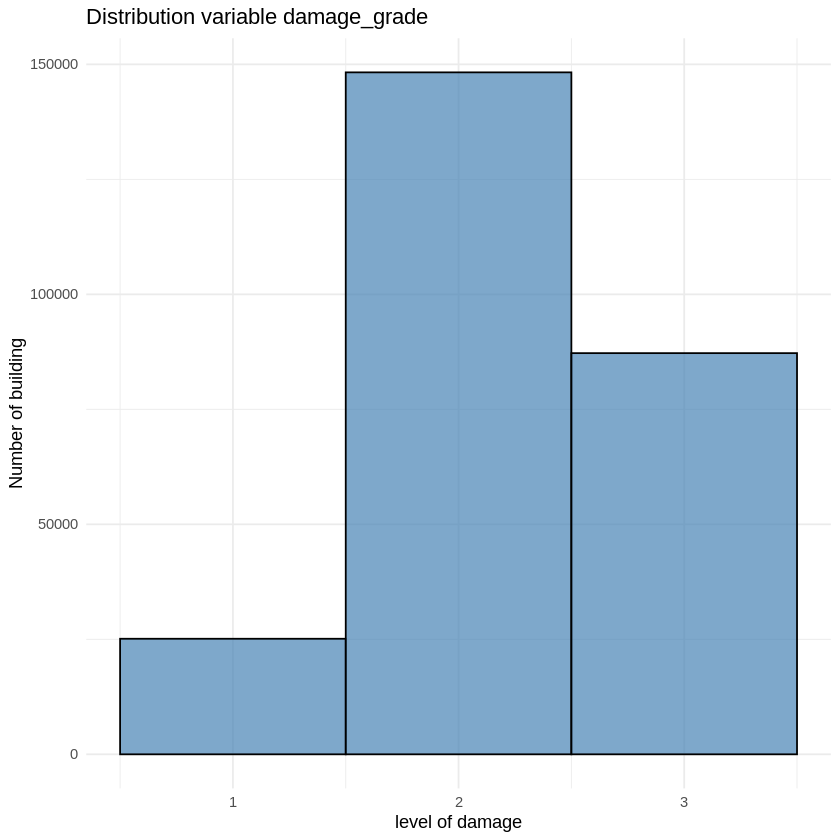

In [ ]:
ggplot(train_labels, aes(x = damage_grade)) +
  geom_histogram(binwidth = 1, fill = "steelblue", color = "black", alpha = 0.7) +
  labs(title = "Distribution variable damage_grade",
       x = "level of damage",
       y = "Number of building") +
  theme_minimal()


We can see that the damage_grade variable is a categorical variable. It represents the level of damage suffered by the building affected by the earthquake. 

There are three levels of damage:

* 1 = represents a low level of damage
* 2 = represents a medium level of damage
* 3 = represents almost complete destruction

In [ ]:
str(train_features)

'data.frame':	260601 obs. of  39 variables:
 $ building_id                           : int  802906 28830 94947 590882 201944 333020 728451 475515 441126 989500 ...
 $ geo_level_1_id                        : int  6 8 21 22 11 8 9 20 0 26 ...
 $ geo_level_2_id                        : int  487 900 363 418 131 558 475 323 757 886 ...
 $ geo_level_3_id                        : int  12198 2812 8973 10694 1488 6089 12066 12236 7219 994 ...
 $ count_floors_pre_eq                   : int  2 2 2 2 3 2 2 2 2 1 ...
 $ age                                   : int  30 10 10 10 30 10 25 0 15 0 ...
 $ area_percentage                       : int  6 8 5 6 8 9 3 8 8 13 ...
 $ height_percentage                     : int  5 7 5 5 9 5 4 6 6 4 ...
 $ land_surface_condition                : Factor w/ 3 levels "n","o","t": 3 2 3 3 3 3 1 3 3 3 ...
 $ foundation_type                       : Factor w/ 5 levels "h","i","r","u",..: 3 3 3 3 3 3 3 5 3 2 ...
 $ roof_type                             : Factor w/ 3 level

In [ ]:
str(test_features)

'data.frame':	86868 obs. of  39 variables:
 $ building_id                           : int  300051 99355 890251 745817 421793 871976 691228 896100 343471 766647 ...
 $ geo_level_1_id                        : int  17 6 22 26 17 22 26 8 16 26 ...
 $ geo_level_2_id                        : int  596 141 19 39 289 170 432 1373 244 761 ...
 $ geo_level_3_id                        : int  11307 11987 10044 633 7970 4029 6794 958 3521 3137 ...
 $ count_floors_pre_eq                   : int  3 2 2 1 3 1 2 2 2 2 ...
 $ age                                   : int  20 25 5 0 15 55 0 35 30 5 ...
 $ area_percentage                       : int  7 13 4 19 8 4 6 2 6 6 ...
 $ height_percentage                     : int  6 5 5 3 7 3 7 8 5 7 ...
 $ land_surface_condition                : Factor w/ 3 levels "n","o","t": 3 3 3 3 3 3 1 3 3 1 ...
 $ foundation_type                       : Factor w/ 5 levels "h","i","r","u",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ roof_type                             : Factor w/ 3 levels

To process this data, we need to know what types of data we have. The get_var_type function allows us to check the existence of categorical, numerical and binary variables in our datasets. We can observe that we have 
* 8 categorical variables in total, which can take several characteristic values, 
* 22 binary variables (0 and 1), and finally 
* 9 numerical variables which represent integers.

In [ ]:
get_var_type <- function(x) {
  if (is.factor(x)) {
    return("Categorical")
  } else if (length(unique(x)) == 2) {
    return("Binary")
  } else {
    return("Numerical")
  }
}

var_info <- data.frame(variable = names(train_features),
                       var_type = sapply(train_features, get_var_type),
                       count = sapply(train_features, function(x) length(unique(x))))

var_types <- sapply(train_features, get_var_type)
type_counts <- table(var_types)
type_counts

var_info_test <- data.frame(variable = names(test_features),
                       var_type = sapply(test_features, get_var_type),
                       count = sapply(test_features, function(x) length(unique(x))))

var_types_test <- sapply(test_features, get_var_type)
type_counts_test <- table(var_types_test)
type_counts_test


var_types
     Binary Categorical   Numerical 
         22           8           9 

var_types_test
     Binary Categorical   Numerical 
         22           8           9 

In [ ]:
get_var_type <- function(x) {
  if (is.factor(x)) {
    return("Categorical")
  } else if (length(unique(x)) == 2) {
    return("Binary")
  } else {
    return("Numerical")
  }
}

var_types <- sapply(train_features, get_var_type)

categorical_indices <- which(var_types == "Categorical")
binary_indices <- which(var_types == "Binary")
numeric_indices <- which(var_types == "Numerical")
categorical_variables <- names(train_features)[categorical_indices]
binary_variables <- names(train_features)[binary_indices]
numeric_variables <- names(train_features)[numeric_indices]
cat("Categorical variables:\n")
print(categorical_variables)

cat("Binary variables:\n")
print(binary_variables)

cat("Numeric variables:\n")
print(numeric_variables)

Categorical variables:
[1] "land_surface_condition" "foundation_type"        "roof_type"             
[4] "ground_floor_type"      "other_floor_type"       "position"              
[7] "plan_configuration"     "legal_ownership_status"
Binary variables:
 [1] "has_superstructure_adobe_mud"          
 [2] "has_superstructure_mud_mortar_stone"   
 [3] "has_superstructure_stone_flag"         
 [4] "has_superstructure_cement_mortar_stone"
 [5] "has_superstructure_mud_mortar_brick"   
 [6] "has_superstructure_cement_mortar_brick"
 [7] "has_superstructure_timber"             
 [8] "has_superstructure_bamboo"             
 [9] "has_superstructure_rc_non_engineered"  
[10] "has_superstructure_rc_engineered"      
[11] "has_superstructure_other"              
[12] "has_secondary_use"                     
[13] "has_secondary_use_agriculture"         
[14] "has_secondary_use_hotel"               
[15] "has_secondary_use_rental"              
[16] "has_secondary_use_institution"         
[17] "has_s

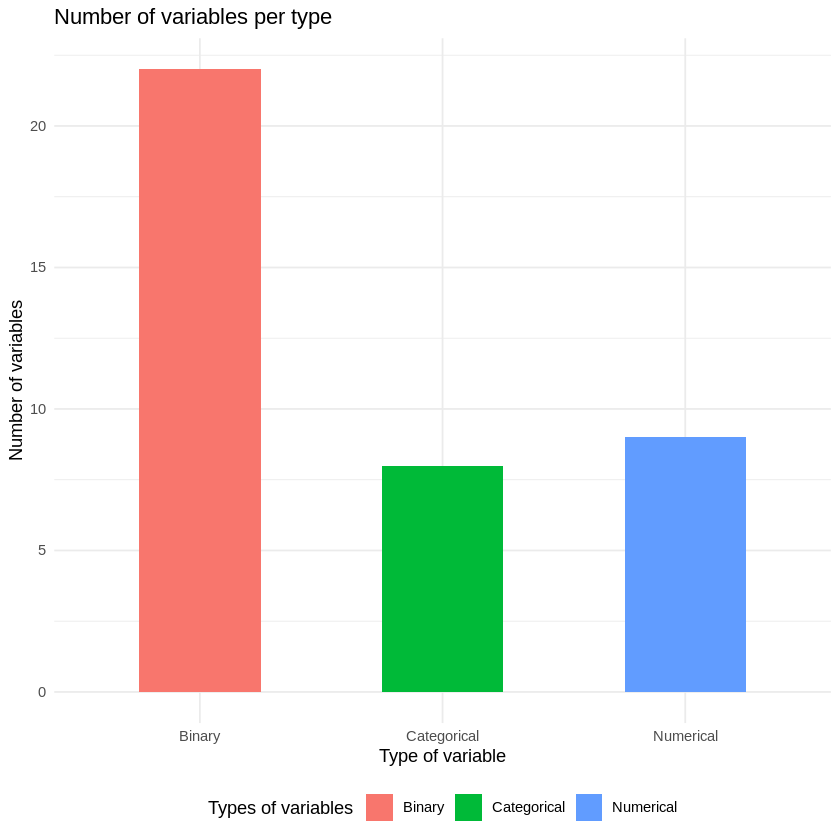

In [ ]:
var_types_df <- data.frame(
  Type = c("Binary", "Categorical", "Numerical"),
  Count = c(22, 8, 9)
)

ggplot(var_types_df, aes(x = Type, y = Count, fill = Type)) +
  geom_bar(stat = "identity", width = 0.5) +
  theme_minimal() +
  labs(title = "Number of variables per type", x = "Type of variable", y = "Number of variables") +
  scale_fill_discrete(name = "Types of variables") +
  theme(legend.position = "bottom")

## Missing value imputation

Our analysis and observations allow us to conclude that the data set contains no missing (MV) or unattributed (NA) values for the variables present. This means that the data are complete and that no imputation or method of handling missing values is necessary for our analysis. The absence of missing values is an advantage for our project, as it reduces the risk of introducing errors in the analysis and the predictive model. It also facilitates the data preparation process, as we can focus on other aspects such as feature selection, feature engineering and model building without having to worry about missing values.

In [ ]:
missing_values <- sapply(train_features, function(x) sum(is.na(x)))
print(missing_values)


                           building_id                         geo_level_1_id 
                                     0                                      0 
                        geo_level_2_id                         geo_level_3_id 
                                     0                                      0 
                   count_floors_pre_eq                                    age 
                                     0                                      0 
                       area_percentage                      height_percentage 
                                     0                                      0 
                land_surface_condition                        foundation_type 
                                     0                                      0 
                             roof_type                      ground_floor_type 
                                     0                                      0 
                      other_floor_type              

In [ ]:
dim(test_features) 
dim(na.omit(test_features))

[1] 86868    39

[1] 86868    39

In [ ]:
dim(train_features) 
dim(na.omit(train_features))

[1] 260601     39

[1] 260601     39

## feature engineering

Feature engineering is the process of creating new features (variables) from existing data to improve the performance of machine learning models. This process can include transforming data, combining multiple features, extracting new information from existing data, or converting categorical data into numerical data or binary data. 

To improve the accuracy of the model we have created a new binary variable fragile_building to group the buildings that we consider as fragile according to the characteristics of the superstructure. 

For example, we consider fragile buildings as those with adobe/mud, mud mortar/stone or mud mortar/brick superstructures and the rest as non-fragile. 


*   if fragile_building == 1 then the buildings 
considered as fragile and 0 for the others

In [ ]:
test_features$solid_building <- ifelse(
  ((test_features$has_superstructure_rc_engineered == 1 | 
     test_features$has_superstructure_rc_non_engineered == 1) & 
   (test_features$foundation_type %in% c('r', 'w')) & 
   (test_features$age < 10)), 
  1, 
  0
)

train_features$solid_building <- ifelse(
  ((train_features$has_superstructure_rc_engineered == 1 | 
    train_features$has_superstructure_rc_non_engineered == 1) & 
   (train_features$foundation_type %in% c('r', 'w')) & 
   (train_features$age < 10)), 
  1, 
  0
)

In [ ]:
# Rove building_id in train_data and test_data
train_data <- subset(train_features, select = -building_id)
test_data <- subset(test_features, select = -building_id)
train_labels<- subset(train_labels, select = -building_id)
dim(train_data)
dim(test_data)
dim(train_labels)

[1] 260601     39

[1] 86868    39

[1] 260601      1

In [ ]:
head(test_data)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,⋯,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,solid_building
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,17,596,11307,3,20,7,6,t,r,n,⋯,0,0,0,0,0,0,0,0,0,0
2,6,141,11987,2,25,13,5,t,r,n,⋯,0,0,0,0,0,0,0,0,0,0
3,22,19,10044,2,5,4,5,t,r,n,⋯,0,0,0,0,0,0,0,0,0,0
4,26,39,633,1,0,19,3,t,r,x,⋯,0,1,0,0,0,0,0,0,0,0
5,17,289,7970,3,15,8,7,t,r,q,⋯,0,0,0,0,0,0,0,0,0,0
6,22,170,4029,1,55,4,3,t,r,q,⋯,0,0,0,0,0,0,0,0,0,0


## Encoding data 
The goal of converting categorical values to numeric values is to make them compatible with machine learning algorithms, which typically work with numerical data. Two common strategies for doing so are integer encoding and one-hot encoding.

*  Integer encoding: In integer encoding, each unique category within a categorical variable is assigned a unique integer.This method is straightforward, but it implies an ordinal relationship between categories, which may not always be appropriate.

*  One-hot encoding: One-hot encoding creates binary (0 or 1) features for each unique category within a categorical variable. Each category is represented by a separate feature (or column) in the dataset.One-hot encoding does not imply any ordinal relationship between categories, which can be advantageous when working with categorical variables without a natural order.One of the main drawbacks of one-hot encoding is that it can greatly increase the number of variables in the dataset, which can become problematic when dealing with large or high-dimensional datasets.

Our datasets have 8 categorical variables and on average 5 categories each. Although one hot encoding increases the dimensionality of the variables its use in this project is quite reasonable as the number of categories in each variable is not too high. One-hot encoding will create a new binary variable for each possible category, which should not result in an excessive number of new variables (40 variables in total as each categorical variable has 5 categories on average). 

In [ ]:
# function to encoding
onehot_encoding <- function(df) {
  for (colname in colnames(df)) {
    if (class(df[[colname]]) == "factor") {
      #cat("Encodage one-hot pour la colonne", colname, "\n")
      dummy_cols <- model.matrix(~ df[[colname]] - 1) # 
      colnames(dummy_cols) <- paste(colname, levels(df[[colname]]), sep="_") 
      df <- cbind(df, dummy_cols) # Add the binary coluim dataframe
      df[[colname]] <- NULL # delete the last categ
    }
  }
  return(df)
}

In [ ]:
encoded_train_data <- onehot_encoding(train_data)
encoded_test_features <- onehot_encoding(test_data)

dim(encoded_train_data)
dim(encoded_test_features)
N<-nrow(encoded_train_data)
n<-ncol(encoded_test_features)
n

[1] 260601     69

[1] 86868    69

[1] 69

In [ ]:
head(encoded_test_features)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,⋯,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,17,596,11307,3,20,7,6,0,1,0,⋯,0,0,0,0,0,0,0,0,1,0
2,6,141,11987,2,25,13,5,0,1,0,⋯,0,0,0,0,0,0,0,0,1,0
3,22,19,10044,2,5,4,5,0,1,0,⋯,0,0,0,0,0,0,0,0,1,0
4,26,39,633,1,0,19,3,0,0,0,⋯,0,0,0,0,0,0,0,0,1,0
5,17,289,7970,3,15,8,7,0,1,0,⋯,0,0,0,0,0,0,0,0,1,0
6,22,170,4029,1,55,4,3,0,1,0,⋯,0,0,0,0,0,0,0,0,1,0


In [ ]:
summary(encoded_test_features)

 geo_level_1_id  geo_level_2_id   geo_level_3_id  count_floors_pre_eq
 Min.   : 0.00   Min.   :   0.0   Min.   :    0   Min.   :1.000      
 1st Qu.: 7.00   1st Qu.: 350.0   1st Qu.: 3073   1st Qu.:2.000      
 Median :12.00   Median : 709.0   Median : 6276   Median :2.000      
 Mean   :13.89   Mean   : 704.1   Mean   : 6262   Mean   :2.133      
 3rd Qu.:21.00   3rd Qu.:1054.0   3rd Qu.: 9416   3rd Qu.:2.000      
 Max.   :30.00   Max.   :1427.0   Max.   :12567   Max.   :8.000      
      age         area_percentage  height_percentage
 Min.   :  0.00   Min.   : 1.000   Min.   : 2.000   
 1st Qu.: 10.00   1st Qu.: 5.000   1st Qu.: 4.000   
 Median : 15.00   Median : 7.000   Median : 5.000   
 Mean   : 26.55   Mean   : 8.014   Mean   : 5.436   
 3rd Qu.: 30.00   3rd Qu.: 9.000   3rd Qu.: 6.000   
 Max.   :995.00   Max.   :92.000   Max.   :32.000   
 has_superstructure_adobe_mud has_superstructure_mud_mortar_stone
 Min.   :0.00000              Min.   :0.0000                     
 1st Qu

## Feature selection 

Feature selection is the process of selecting the most relevant or useful variables for building a predictive model from an initial set of variables or features.This can reduce overfitting, improve accuracy, and reduce training time.

The goal of feature selection is to reduce the complexity of the model and improve its performance by eliminating redundant or irrelevant features, and focusing on the features that are most important for the prediction task. At present our dataset contains 69 variables that are not large enough for our observations because it is recommended to perform feature selection when the number of variables is high so we would like to keep all of them. 
However we will apply some technique to observe the most relevant variables for the prediction task.

Two main approaches to feature selection are:

* Filter methods:are a type of feature selection methods that select features based on their individual characteristics. The main idea behind filter methods is to evaluate each feature independently in terms of its predictive power and relevance to the output variable.

   Examples:  PCA,  correlation, minimum redundancy maximum relevance (mRMR) 
* Wrapper methods: are a type of method that considers the selection of a set of features as a search problem. These methods evaluate subsets of features, meaning that they take into account the interactions between features. Examples of wrapper methods include recursive feature elimination, forward selection

# Correlation 
Variables that have a high correlation with the target variable can be considered the most relevant for the prediction of our datasets. In addition, variables that have a low correlation with the target variable may be considered less relevant or even irrelevant for prediction.

The Pearson correlation coefficient formula is:

$r = \frac{\sum\limits_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum\limits_{i=1}^n (x_i - \bar{x})^2 \sum\limits_{i=1}^n (y_i - \bar{y})^2}}$

where:

* r is the correlation coefficient,
* xi, yi are the individual sample points indexed with i,
* x̄, ȳ are the mean values of x and y.

In [ ]:
CV_folds <- 10

size_CV <-floor(N/CV_folds)
#selected_nb_features <- 69
CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-encoded_train_data[idx_ts,]
    Y_ts<-train_labels$damage_grade[idx_ts]
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-encoded_train_data[idx_tr,]
    Y_tr<-train_labels$damage_grade[idx_tr]                          
    
    # Compute correlation across all the input variables and the target variable
    correlation_vector <-abs(cor(X_tr,Y_tr))
    # Rank variables according to correlation with the output
    correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix
     
    for (nb_features in 1:n) {
        # Create a dataset including only the nb_features most correlated variables with the output
        DS<-cbind(X_tr[,correlation_ranking_idx[1:nb_features],drop=F],damage_grade=Y_tr)
        # Model fit (using lm function)
        model<- lm(damage_grade~.,DS)
        
        # Model prediction
        Y_hat_ts<- predict(model,X_ts[,correlation_ranking_idx[1:nb_features],drop=F])
        
        # Cross validation error = MSE
        CV_err[nb_features,i] <- mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))

variable_names <- names(X_tr)[correlation_ranking_idx[1:nb_features]]
print(paste(variable_names))
correlation_ranking_idx

 [1] "#Features:  1  ; CV error= 0.3302  ; std dev= 0.0022" 
 [2] "#Features:  2  ; CV error= 0.3199  ; std dev= 0.0019" 
 [3] "#Features:  3  ; CV error= 0.3174  ; std dev= 0.0019" 
 [4] "#Features:  4  ; CV error= 0.3169  ; std dev= 0.0018" 
 [5] "#Features:  5  ; CV error= 0.3166  ; std dev= 0.0018" 
 [6] "#Features:  6  ; CV error= 0.3158  ; std dev= 0.0018" 
 [7] "#Features:  7  ; CV error= 0.3158  ; std dev= 0.0018" 
 [8] "#Features:  8  ; CV error= 0.3158  ; std dev= 0.0018" 
 [9] "#Features:  9  ; CV error= 0.3155  ; std dev= 0.0018" 
[10] "#Features:  10  ; CV error= 0.3131  ; std dev= 0.0018"
[11] "#Features:  11  ; CV error= 0.3131  ; std dev= 0.0018"
[12] "#Features:  12  ; CV error= 0.313  ; std dev= 0.0018" 
[13] "#Features:  13  ; CV error= 0.313  ; std dev= 0.0018" 
[14] "#Features:  14  ; CV error= 0.3122  ; std dev= 0.0019"
[15] "#Features:  15  ; CV error= 0.3122  ; std dev= 0.0019"
[16] "#Features:  16  ; CV error= 0.3094  ; std dev= 0.0018"
[17] "#Features:  17  ; 

[1] 37 45  9 42 36 13 43 50 17 39 49 16 38 48  6  4 22 23 66 40 20 41  1 14 10
[26] 15 65 11 19  8 55  7 68 51 58  2 52 18 69  5 24 54 31 57 56 44 47 30 34 33
[51] 35 12 62 21 26 64 25 32 28 63 27  3 60 46 53 67 61 29 59

In [ ]:

variable_names <- names(X_tr)[correlation_ranking_idx[1:nb_features]]
print(paste(variable_names))
correlation_ranking_idx

 [1] "foundation_type_r"                     
 [2] "ground_floor_type_v"                   
 [3] "has_superstructure_mud_mortar_stone"   
 [4] "roof_type_x"                           
 [5] "foundation_type_i"                     
 [6] "has_superstructure_cement_mortar_brick"
 [7] "ground_floor_type_f"                   
 [8] "other_floor_type_s"                    
 [9] "has_superstructure_rc_engineered"      
[10] "foundation_type_w"                     
[11] "other_floor_type_q"                    
[12] "has_superstructure_rc_non_engineered"  
[13] "foundation_type_u"                     
[14] "other_floor_type_j"                    
[15] "area_percentage"                       
[16] "count_floors_pre_eq"                   
[17] "has_secondary_use_hotel"               
[18] "has_secondary_use_rental"              
[19] "legal_ownership_status_a"              
[20] "roof_type_n"                           
[21] "has_secondary_use"                     
[22] "roof_type_q"                

[1] 37 45  9 42 36 13 43 50 17 39 49 16 38 48  6  4 22 23 66 40 20 41  1 14 10
[26] 15 65 11 19  8 55  7 68 51 58  2 52 18 69  5 24 54 31 57 56 44 47 30 34 33
[51] 35 12 62 21 26 64 25 32 28 63 27  3 60 46 53 67 61 29 59

## Minimum Redundancy Maximum Relevance (mRMR)

The mRMR method is a feature selection approach that tries to select features that are highly correlated with the class (maximum relevance) but uncorrelated with each other (minimum redundancy). The goal is to select features that individually have high predictive power and collectively provide as much non-overlapping information as possible.
For the relevance of a feature set S with respect to the target variable Y

MaxRelevance(S) is defined as follows:

MaxRelevance(S) = $\frac{1}{|S|} \sum_{i} I(x_i; Y)$


where $|S|$ is the number of features in the set, $x_i$ is the i-th feature, and $I(x_i; Y)$ is the mutual information between $x_i$ and $Y$.

The redundancy of a feature set $S$ can be defined as follows:


MinRedundancy(S) =$\frac{1}{|S|^2} \sum_{i} \sum_{j} I(x_i; x_j)$


where $|S|$ is the number of features in the set, $x_i$ and $x_j$ are features in the set, and $I(x_i; x_j)$ is the mutual information between $x_i$ and $x_j$.

The mRMR criterion can be defined as a combination of MaxRelevance and MinRedundancy:




mRMR = MaxRelevance(S) - MinRedundancy(S)

The goal of mRMR is to maximize this criterion.


In [ ]:

CV_folds <- 10
#n_variables <- 20


size_CV <- floor(N / CV_folds)

CV_err <- matrix(0, nrow = n, ncol = CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts <- (((i - 1) * size_CV + 1):(i * size_CV))
    X_ts <- encoded_train_data[idx_ts,]
    Y_ts <- train_labels$damage_grade[idx_ts]
    
    idx_tr <- setdiff(1:N, idx_ts)
    X_tr <- encoded_train_data[idx_tr,]
    Y_tr <- train_labels$damage_grade[idx_tr]
    
    correlation <- abs(cor(X_tr, Y_tr))
    
    selected <- c()
    candidates <- 1:n
    
    for (j in 1:n) {
        redundancy_score <- numeric(length(candidates))
        
        if (length(selected) > 0) {
            cor_selected_candidates <- cor(X_tr[, selected, drop = F], X_tr[, candidates, drop = F])
            redundancy_score <- apply(cor_selected_candidates, 2, mean)
        }
        
        mRMR_score <- correlation[candidates] - redundancy_score
        selected_current <- candidates[which.max(mRMR_score)]
        selected <- c(selected, selected_current)
        candidates <- setdiff(candidates, selected_current)
    }
    
    ranking <- selected
     
    for (nb_features in 1:n) {
        DS <- cbind(X_tr[, ranking[1:nb_features], drop = F], damage_grade = Y_tr)
       # Model fit (using lm function)
        model<- lm(damage_grade~.,DS)
        Y_hat_ts<- predict(model,X_ts[,ranking[1:nb_features],drop=F])
        
        # Cross-validation error = MSE
        CV_err[nb_features,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ", c(1:n), " ; CV error=", round(apply(CV_err, 1, mean), digits = 4), " ; std dev=", round(apply(CV_err, 1, sd), digits = 4)))

CV_err_svm_single_model_fs <- CV_err


 [1] "#Features:  1  ; CV error= 0.3302  ; std dev= 0.0022" 
 [2] "#Features:  2  ; CV error= 0.3199  ; std dev= 0.0019" 
 [3] "#Features:  3  ; CV error= 0.3189  ; std dev= 0.002"  
 [4] "#Features:  4  ; CV error= 0.3166  ; std dev= 0.0019" 
 [5] "#Features:  5  ; CV error= 0.3154  ; std dev= 0.0019" 
 [6] "#Features:  6  ; CV error= 0.3153  ; std dev= 0.0019" 
 [7] "#Features:  7  ; CV error= 0.3146  ; std dev= 0.0019" 
 [8] "#Features:  8  ; CV error= 0.3135  ; std dev= 0.0018" 
 [9] "#Features:  9  ; CV error= 0.3135  ; std dev= 0.0018" 
[10] "#Features:  10  ; CV error= 0.3135  ; std dev= 0.0018"
[11] "#Features:  11  ; CV error= 0.3127  ; std dev= 0.0019"
[12] "#Features:  12  ; CV error= 0.31  ; std dev= 0.0018"  
[13] "#Features:  13  ; CV error= 0.3099  ; std dev= 0.0018"
[14] "#Features:  14  ; CV error= 0.3091  ; std dev= 0.0017"
[15] "#Features:  15  ; CV error= 0.3091  ; std dev= 0.0017"
[16] "#Features:  16  ; CV error= 0.3087  ; std dev= 0.0017"
[17] "#Features:  17  ; 

In [ ]:
selected_variable_names <- colnames(encoded_train_data)[ranking]

selected_variable_names
ranking

[1] "foundation_type_r"                     
 [2] "ground_floor_type_v"                   
 [3] "foundation_type_w"                     
 [4] "has_superstructure_mud_mortar_stone"   
 [5] "roof_type_x"                           
 [6] "ground_floor_type_f"                   
 [7] "has_superstructure_cement_mortar_brick"
 [8] "foundation_type_i"                     
 [9] "other_floor_type_q"                    
[10] "foundation_type_u"                     
[11] "other_floor_type_j"                    
[12] "count_floors_pre_eq"                   
[13] "other_floor_type_s"                    
[14] "roof_type_n"                           
[15] "roof_type_q"                           
[16] "has_superstructure_rc_engineered"      
[17] "has_superstructure_rc_non_engineered"  
[18] "other_floor_type_x"                    
[19] "has_superstructure_timber"             
[20] "legal_ownership_status_a"              
[21] "legal_ownership_status_v"              
[22] "area_percentage"                       
[23] "has_superstructure_adobe_mud"          
[24] "has_superstructure_stone_flag"         
[25] "has_secondary_use_hotel"               
[26] "geo_level_1_id"                        
[27] "has_secondary_use_rental"              
[28] "plan_configuration_d"                  
[29] "plan_configuration_u"                  
[30] "position_s"                            
[31] "position_t"                            
[32] "geo_level_2_id"                        
[33] "has_superstructure_bamboo"             
[34] "count_families"                        
[35] "has_superstructure_cement_mortar_stone"
[36] "legal_ownership_status_w"              
[37] "has_secondary_use"                     
[38] "age"                                   
[39] "ground_floor_type_x"                   
[40] "plan_configuration_q"                  
[41] "has_superstructure_other"              
[42] "plan_configuration_a"                  
[43] "plan_configuration_c"                  
[44] "has_secondary_use_institution"         
[45] "ground_floor_type_z"                   
[46] "position_j"                            
[47] "ground_floor_type_m"                   
[48] "solid_building"                        
[49] "land_surface_condition_t"              
[50] "land_surface_condition_n"              
[51] "land_surface_condition_o"              
[52] "height_percentage"                     
[53] "foundation_type_h"                     
[54] "plan_configuration_o"                  
[55] "plan_configuration_s"                  
[56] "has_secondary_use_other"               
[57] "legal_ownership_status_r"              
[58] "geo_level_3_id"                        
[59] "has_secondary_use_industry"            
[60] "has_secondary_use_health_post"         
[61] "has_secondary_use_gov_office"          
[62] "has_secondary_use_school"              
[63] "plan_configuration_m"                  
[64] "has_superstructure_mud_mortar_brick"   
[65] "has_secondary_use_agriculture"         
[66] "plan_configuration_n"                  
[67] "has_secondary_use_use_police"          
[68] "plan_configuration_f"                  
[69] "position_o"

[1] 37 45 39  9 42 43 13 36 49 38 48  4 50 40 41 17 16 51 14 66 68  6  8 10 22
[26]  1 23 58 65 54 55  2 15 19 11 69 20  5 46 63 18 56 57 24 47 52 44 31 34 32
[51] 33  7 35 62 64 30 67  3 26 27 28 25 60 12 21 61 29 59 53

## Principal Component Analysis (PCA):

PCA is a dimensionality reduction technique that is often used to simplify the dataset with many interrelated variables, while retaining as much as possible of the variation present in the dataset.

he  works by calculating a new set of variables, called principal components, each of which is a linear combination of the input variables. The principal components are orthogonal to each other, meaning they're uncorrelated.

In [ ]:
#kept only 45 variable for the model 
r_data<-encoded_train_data[ranking[0:40]]
dim(r_data)
r_test<-encoded_test_features[ranking[0:40]]
c_data<-encoded_train_data[correlation_ranking_idx[0:40]]
c_test <-encoded_test_features[correlation_ranking_idx[0:40]]
dim(c_data)
dim(r_test)

[1] 260601     40

[1] 260601     40

[1] 86868    40

In [ ]:
# create data for training model 
dammage <- train_labels$damage_grade
data_train<-cbind(r_data, dammage)
unique(data_train$dammage)
dim(train_labels)
dim(train_labels)

[1] 3 2 1

[1] 260601      1

[1] 260601      1

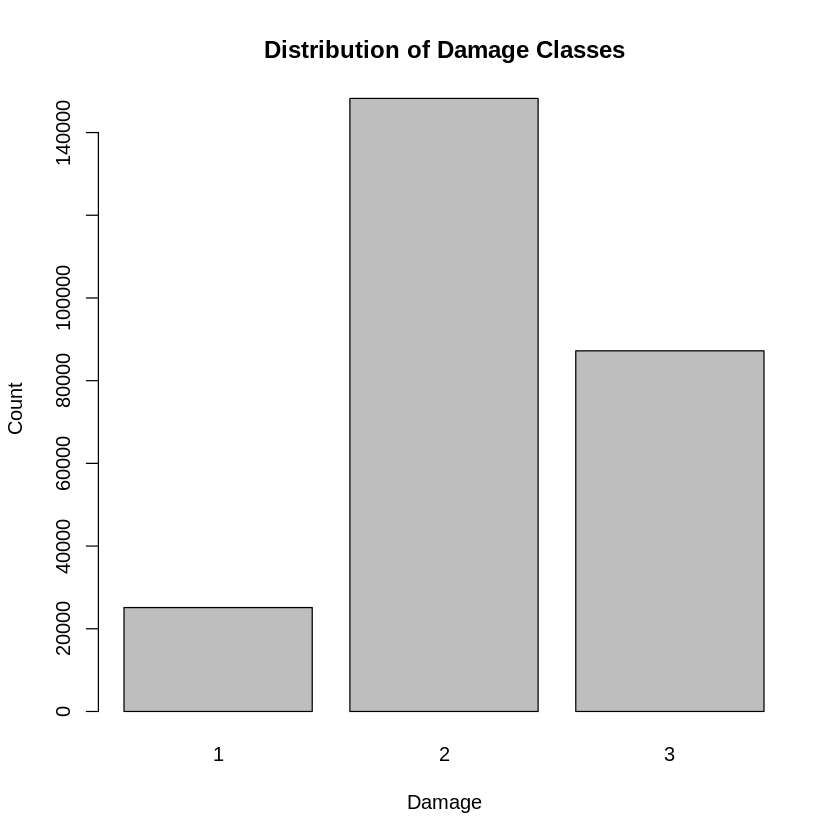

In [ ]:
# Créer une table de fréquence
damage_freq <- table(dammage)

# Créer un barplot
barplot(damage_freq, main = "Distribution of Damage Classes", xlab = "Damage", ylab = "Count")





## Performance metric

We are predicting the level of damage from 1 to 3. The level of damage is an ordinal variable meaning that ordering is important. 

to measure the performance of our algorithms, we'll use the F1 score which balances the precision and recall of a classifier. Traditionally, the F1 score is used to evaluate performance on a binary classifier, but since we have three possible labels we will use a variant called the micro averaged F1 score.

\begin{equation}
F_{micro} = 2 \cdot \frac{P_{micro} \cdot R_{micro}}{P_{micro} + R_{micro}}
\end{equation}
where 

$P_{micro} = \frac{\sum_{k=1}^{3} TP_{k}}{\sum_{k=1}^{3} (TP_{k} + FP_{k})}$


$R_{micro} = \frac{\sum_{k=1}^{3} TP_{k}}{\sum_{k=1}^{3} (TP_{k} + FN_{k})}$

and TP is True Positive, FP is False Positive, FN is False Negative, and k
 represents each class in 1,2,3

In [ ]:
# from https://pastebin.com/b6WufBNq

ConfusionMatrix <- function(y_pred, y_true) {
  Confusion_Mat <- table(y_true, y_pred)
  return(Confusion_Mat)
}
 
ConfusionDF <- function(y_pred, y_true) {
  Confusion_DF <- transform(as.data.frame(ConfusionMatrix(y_pred, y_true)),
                            y_true = as.character(y_true),
                            y_pred = as.character(y_pred),
                            Freq = as.integer(Freq))
  return(Confusion_DF)
}
 
Precision_micro <- function(y_true, y_pred, labels = NULL) {
  Confusion_DF <- ConfusionDF(y_pred, y_true)
 
  if (is.null(labels) == TRUE) labels <- unique(c(y_true, y_pred))
  # this is not bulletproof since there might be labels missing (in strange cases)
  # in strange cases where they existed in training set but are missing from test ground truth and predictions.
 
  TP <- c()
  FP <- c()
  for (i in c(1:length(labels))) {
    positive <- labels[i]
   
    # it may happen that a label is never predicted (missing from y_pred) but exists in y_true
    # in this case ConfusionDF will not have these lines and thus the simplified code crashes
    # TP[i] <- as.integer(Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred==positive), "Freq"])
    # FP[i] <- as.integer(sum(Confusion_DF[which(Confusion_DF$y_true!=positive & Confusion_DF$y_pred==positive), "Freq"]))
   
    # workaround:
    # i don't want to change ConfusionDF since i don't know if the current behaviour is a feature or a bug.
    tmp <- Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred==positive), "Freq"]
    TP[i] <- if (length(tmp)==0) 0 else as.integer(tmp)
   
    tmp <- Confusion_DF[which(Confusion_DF$y_true!=positive & Confusion_DF$y_pred==positive), "Freq"]
    FP[i] <- if (length(tmp)==0) 0 else as.integer(sum(tmp))
  }
  Precision_micro <- sum(TP) / (sum(TP) + sum(FP))
  return(Precision_micro)
}
 
Recall_micro <- function(y_true, y_pred, labels = NULL) {
  Confusion_DF <- ConfusionDF(y_pred, y_true)
 
  if (is.null(labels) == TRUE) labels <- unique(c(y_true, y_pred))
  # this is not bulletproof since there might be labels missing (in strange cases)
  # in strange cases where they existed in training set but are missing from test ground truth and predictions.
 
  TP <- c()
  FN <- c()
  for (i in c(1:length(labels))) {
    positive <- labels[i]
   
    # short version, comment out due to bug or feature of Confusion_DF
    # TP[i] <- as.integer(Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred==positive), "Freq"])
    # FP[i] <- as.integer(sum(Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred!=positive), "Freq"]))
   
    # workaround:
    tmp <- Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred==positive), "Freq"]
    TP[i] <- if (length(tmp)==0) 0 else as.integer(tmp)
 
    tmp <- Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred!=positive), "Freq"]
    FN[i] <- if (length(tmp)==0) 0 else as.integer(sum(tmp))
  }
  Recall_micro <- sum(TP) / (sum(TP) + sum(FN))
  return(Recall_micro)
}
 
F1_Score_micro <- function(y_true, y_pred, labels = NULL) {
  if (is.null(labels) == TRUE) labels <- unique(c(y_true, y_pred)) # possible problems if labels are missing from y_*
  Precision <- Precision_micro(y_true, y_pred, labels)
  Recall <- Recall_micro(y_true, y_pred, labels)
  F1_Score_micro <- 2 * (Precision * Recall) / (Precision + Recall)
  return(F1_Score_micro)
}

In [ ]:
dim(data_train)

[1] 260601     41

## model selection


In [ ]:
reg_Trees <- function(out_data, in_data, k){
  out_data <- as.factor(out_data) # Convert target variable to factor
  index <- sample(1:nrow(in_data)) #reshuffle the rows
  max <- ceiling(nrow(in_data)/k) #get the size of each subset of the training set
  splits <- split(index, ceiling(seq_along(index)/max)) #split the rows into subsets
  accuracy_vec <- rep(NA,k) #vector that will contain the accuracies
  misclassification_rate_vec <- rep(NA,k) #vector that will contain the misclassification rates
  f1_score_vec <- rep(NA,k) #vector that will contain the F1 scores
  for (i in 1:k){ #k-fold
    train_data <- in_data[-splits[[i]],] #select everything but one subset
    out_train <- out_data[-splits[[i]]] #select everything but one subset
    combined_train <- cbind(out_train,train_data) #combine the input and output
    test_data <- in_data[splits[[i]],] #select one subset
    out_test <- out_data[splits[[i]]] #select one subset
    tree_model <- rpart(out_train~., data = combined_train) #build the model
    out_pred <- predict(tree_model,test_data, type="class") #predict the output of training.features
    conf_mat <- table(out_test,out_pred) #confusion matrix
    accuracy_vec[i] <- sum(diag(conf_mat))/sum(conf_mat) #accuracy
    misclassification_rate_vec[i] <- 1 - accuracy_vec[i] #misclassification rate
    f1_score_vec[i] <- F1_Score_micro(out_test, out_pred) #F1 score
  }
  print(paste("Accuracy:", round(mean(accuracy_vec),3))) #print the mean accuracy
  print(paste("Misclassification Rate:", round(mean(misclassification_rate_vec,na.rm=TRUE),3))) #print the mean misclassification rate
  print(paste("F1 Score:", round(mean(f1_score_vec,na.rm=TRUE),3))) #print the mean F1 score
  combined <- cbind(out_data,in_data)
  return(rpart(out_data~.,data = combined)) #return the model trained on the whole set
}


In [ ]:
sapply(data_train, length)
data_train_clean <- na.omit(data_train)



[1] "Training Set Size :  130300 Test set Size :  130301"


,model.variable.importance
,<dbl>
geo_level_1_id,6829.34032
foundation_type_r,2864.33244
foundation_type_w,1053.99319
foundation_type_u,980.62359
ground_floor_type_v,835.75550
roof_type_x,775.72638
foundation_type_i,725.08061
geo_level_2_id,294.55742
has_superstructure_bamboo,180.15408


[1] "F1 Score: 0.606887130566918"
[1] "Misclassification_rate On Damage Grade Prediction =  0.393112869433082"
[1] "Accuracy On Damage Grade Prediction =  0.606887130566918"


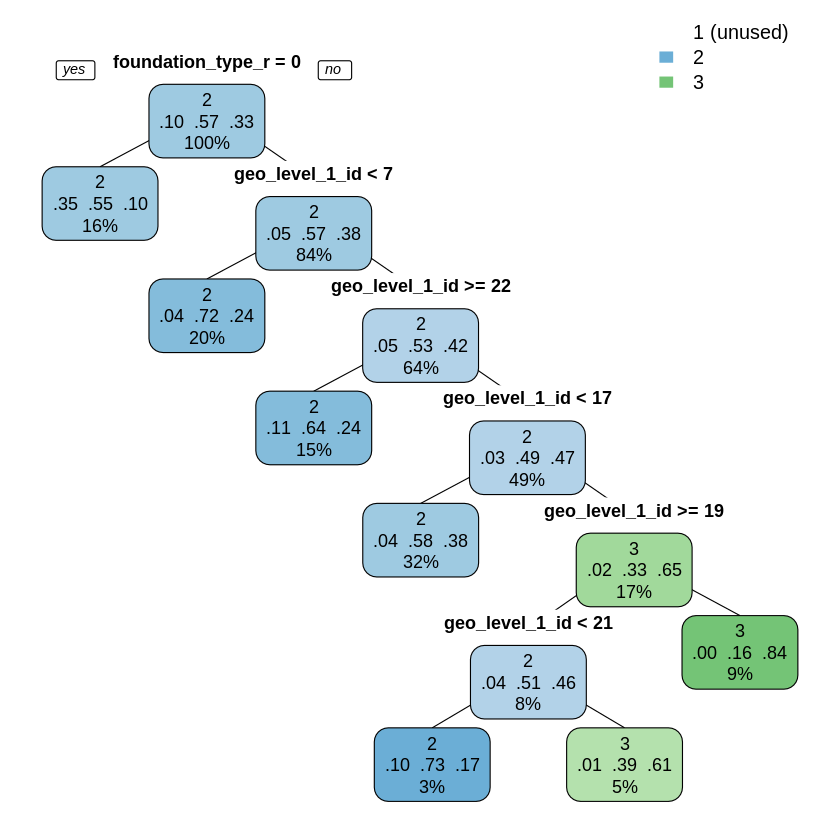

In [ ]:
# 1. Mélanger l'ensemble de données de manière aléatoire.
shuffled_index <- sample(1:nrow(data_train))

# 2. Obtenir l'indice pour la moitié de l'ensemble de données
half_index <- floor(nrow(data_train)/2)

# 3. Diviser les données d'entraînement en deux plus petits dataframes : l'ensemble d'entraînement et l'ensemble de test
train_data <-  data_train[shuffled_index[1:half_index],]
test_data <-  data_train[shuffled_index[(half_index+1):nrow(data_train)],]

#4. Tailles de l'ensemble d'entraînement et de l'ensemble de test
print(paste("Training Set Size : ",half_index ,"Test set Size : ",nrow(data_train)-half_index ))

#5. Entraîner le modèle d'arbre de décision avec rpart 
model <- rpart(dammage ~ . , method="class", data=train_data)

# Visualiser les variables les plus importantes
data.frame(model$variable.importance)

# Visualiser l'arbre de décision du modèle
rpart.plot(model, type=1 , fallen.leaves = F ,cex =0.9)

# Obtenir les prédictions de notre ensemble de test à partir de notre modèle entraîné
Y_pred_probs <- predict(model, test_data[,-ncol(test_data)], type = "prob")

#Y_pred <- predict(model,test_data[,-ncol(test_data)], type = "class")

# Obtenir les résultats réels de l'ensemble de test
Y <- test_data[,ncol(test_data)]
# Matrice de confusion
Y_pred <- ifelse(Y_pred_probs[,1] > 0.3, "1", 
            ifelse(Y_pred_probs[,2] > 0.5, "2", "3"))
confusion_matrix <- table(Y_pred, Y)

# Ajout du calcul du score F1
Y_pred <- as.factor(Y_pred)
Y <- as.factor(Y)
f1_score <- F1_Score_micro(Y, Y_pred)
print(paste("F1 Score:", f1_score))
accuracy = sum(diag(confusion_matrix))/sum(confusion_matrix)
misclassification_rate = 1 - accuracy
print(paste("Misclassification_rate On Damage Grade Prediction = " , misclassification_rate))
print(paste( "Accuracy On Damage Grade Prediction = " , accuracy))





In [ ]:
dammage_tree <- reg_Trees(data_train$dammage, r_data, 10)


treedammage_pred <- predict(dammage_tree, r_test, type = "class")



[1] "Accuracy: 0.642"
[1] "Misclassification Rate: 0.358"
[1] "F1 Score: 0.642"



Classification tree:
rpart(formula = out_data ~ ., data = combined)

Variables actually used in tree construction:
[1] foundation_type_r geo_level_1_id   

Root node error: 112342/260601 = 0.43109

n= 260601 

        CP nsplit rel error  xerror      xstd
1 0.031693      0   1.00000 1.00000 0.0022504
2 0.018951      4   0.87323 0.87323 0.0022016
3 0.010000      6   0.83532 0.83208 0.0021794


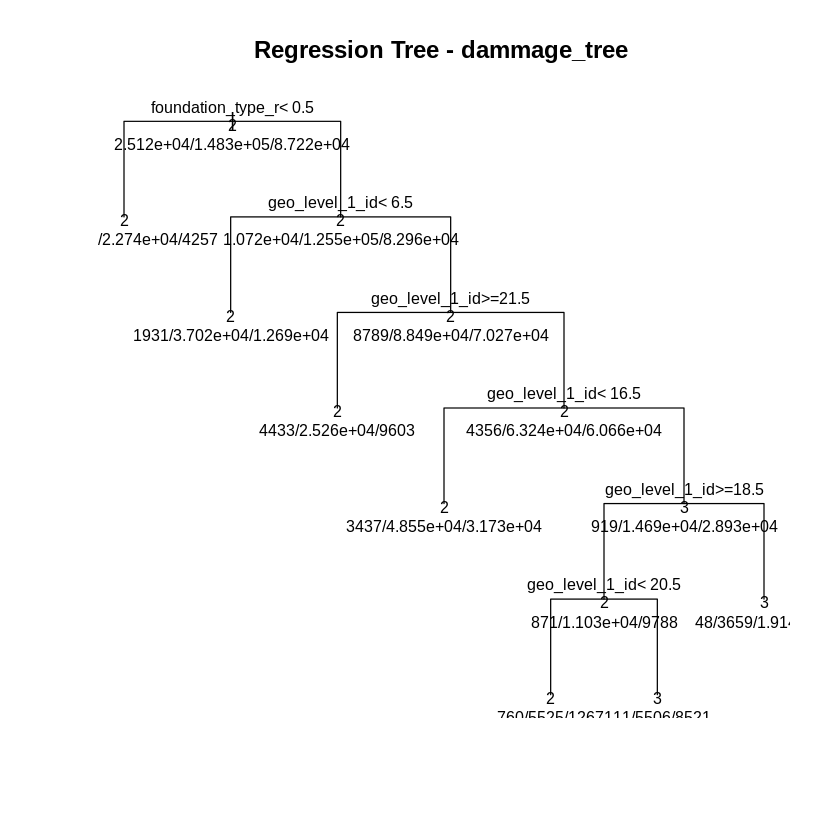

In [ ]:
printcp(dammage_tree )
plot(dammage_tree , uniform=TRUE,
    main="Regression Tree - dammage_tree ")
    text(dammage_tree , use.n=TRUE, all=TRUE, cex=.8)



In [161]:
#df_predictions <- as.data.frame(treedammage_pred)
result_df  <- data.frame(building_id = test_features$building_id, damage_grade = treedammage_pred)

write.csv(result_df, "result_tree.csv", row.names = FALSE)